In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

## Glimpse Data

Read data

In [44]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
btc = pd.read_csv('/content/gdrive/MyDrive/research/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
# Converting the Timestamp column from string to datetime
btc['Timestamp'] = [datetime.fromtimestamp(x) for x in btc['Timestamp']]
btc = btc.set_index('Timestamp')

Select an eventful time period in Bitcoin history

In [46]:
# Select the years 2017 on
btc = btc.loc['2017':]

#### Time resampling

In [47]:
#btc = btc.resample("24H").mean() #daily resampling
btc = btc.resample('1H').mean() # hourly resampling
#btc = btc # no resampling
print(btc.shape)
btc.head()

(35041, 7)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,966.305455,966.390303,966.146667,966.271818,3.105600,3000.829873,966.271116
2017-01-01 01:00:00,964.358125,964.389063,964.179062,964.207813,4.657049,4491.147445,964.290325
2017-01-01 02:00:00,964.255333,964.285000,964.092333,964.121667,3.142247,3030.057872,964.179967
2017-01-01 03:00:00,963.974359,964.022308,963.870000,963.925897,1.990248,1916.324339,963.933474
2017-01-01 04:00:00,962.803810,962.882857,962.794286,962.855714,2.229058,2145.459786,962.847834


In [48]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    print(df.head())
    print(df.isnull().sum())
    
fill_missing(btc)

                           Open        High  ...  Volume_(Currency)  Weighted_Price
Timestamp                                    ...                                   
2017-01-01 00:00:00  966.305455  966.390303  ...        3000.829873      966.271116
2017-01-01 01:00:00  964.358125  964.389063  ...        4491.147445      964.290325
2017-01-01 02:00:00  964.255333  964.285000  ...        3030.057872      964.179967
2017-01-01 03:00:00  963.974359  964.022308  ...        1916.324339      963.933474
2017-01-01 04:00:00  962.803810  962.882857  ...        2145.459786      962.847834

[5 rows x 7 columns]
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


#### Plot time series

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff31903a990>,
      dtype=object)

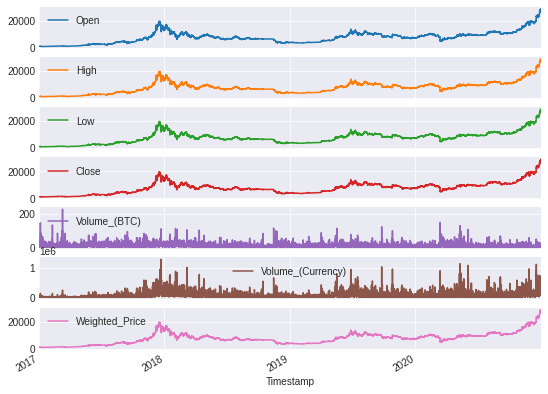

In [49]:
#axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

btc.plot(figsize=(9,7), subplots=True)
#plt.plot()

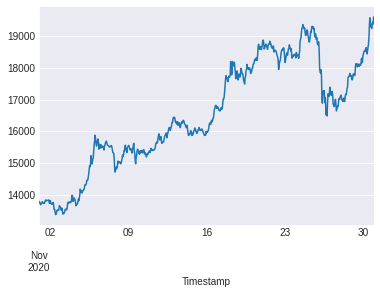

In [50]:
# plot close price during 2020
btc.loc['2020-11', 'Close'].plot()

#### Daily returns

                          Open       High  ...  Volume_(Currency)  Weighted_Price
Timestamp                                  ...                                   
2017-01-01 01:00:00  -1.947330  -2.001241  ...        1490.317572       -1.980792
2017-01-01 02:00:00  -0.102792  -0.104063  ...       -1461.089573       -0.110357
2017-01-01 03:00:00  -0.280974  -0.262692  ...       -1113.733533       -0.246494
2017-01-01 04:00:00  -1.170549  -1.139451  ...         229.135446       -1.085640
2017-01-01 05:00:00   0.434372   0.446234  ...        2542.089571        0.434705
...                        ...        ...  ...                ...             ...
2020-12-30 20:00:00  49.734667  39.132333  ...     -216808.582890       50.663947
2020-12-30 21:00:00  36.400667  35.795500  ...     -136557.713478       36.085701
2020-12-30 22:00:00 -20.482333 -24.866333  ...     -114040.193480      -21.151970
2020-12-30 23:00:00  -9.754500  -7.596000  ...      -45455.176671       -4.484904
2020-12-31 00:00

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff316dc4850>,
      dtype=object)

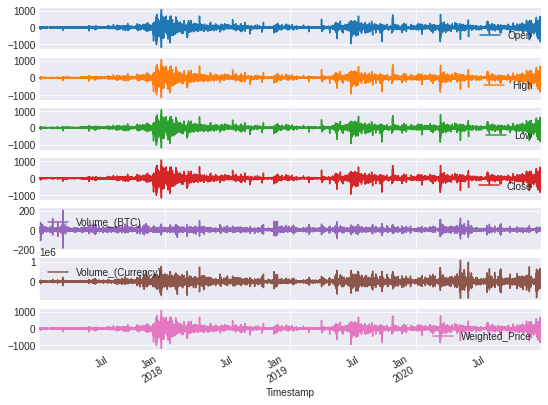

In [51]:
# increment returns
ret = btc - btc.shift(1)

#percent returns
#ret = btc.pct_change(1)

ret.drop(ret.head(1).index, inplace=True)
print(ret)
ret.plot(figsize=(9,7), subplots=True)


#### Time-delay embedding and output to disk

In [52]:
# plot returns corresponding to Close price
#retClose = ret.loc['2020-11', 'Close']
retClose = ret['Close']
print(retClose)
#retClose.plot()

# Obtain numpy array
retClose_array = retClose.values

# Time delay embedding of time series
d=3 # dimension of embedding
g=0 # gap
embedding = retClose_array[(np.arange(d)*(g+1))+ np.arange(np.max(retClose_array.shape[0] - (d-1)*(g+1), 0)).reshape(-1,1)]

print(embedding)

NVertices = embedding.shape[0]

# Write the n-dim time series to disk
with open('/content/gdrive/MyDrive/research/bitcoin/retClose_emb.txt', 'w') as outfile:
  # Format OFF file
  outfile.write('OFF\n')
  outfile.write('{} {} {}\n'.format(NVertices, 0, 0)) # 0 faces, 0 edges
  np.savetxt(outfile, embedding, fmt=['%f', '%f', '%f'], header="x1 x2 x3")


Timestamp
2017-01-01 01:00:00     -2.064006
2017-01-01 02:00:00     -0.086146
2017-01-01 03:00:00     -0.195769
2017-01-01 04:00:00     -1.070183
2017-01-01 05:00:00      0.473377
                          ...    
2020-12-30 20:00:00     45.348333
2020-12-30 21:00:00     38.161833
2020-12-30 22:00:00    -26.843000
2020-12-30 23:00:00     -7.710000
2020-12-31 00:00:00    119.203167
Freq: H, Name: Close, Length: 35040, dtype: float64
[[-2.06400568e+00 -8.61458333e-02 -1.95769231e-01]
 [-8.61458333e-02 -1.95769231e-01 -1.07018315e+00]
 [-1.95769231e-01 -1.07018315e+00  4.73376623e-01]
 ...
 [ 4.53483333e+01  3.81618333e+01 -2.68430000e+01]
 [ 3.81618333e+01 -2.68430000e+01 -7.71000000e+00]
 [-2.68430000e+01 -7.71000000e+00  1.19203167e+02]]


#### Perform TDA using external C++ code

                             Open          High  ...  Weighted_Price          TDA
Timestamp                                        ...                             
2017-01-03 04:00:00   1023.315250   1023.436750  ...     1023.345857     1.512730
2017-01-03 05:00:00   1022.452955   1022.454318  ...     1022.299328     1.521520
2017-01-03 06:00:00   1017.268864   1017.485000  ...     1017.148655     0.889232
2017-01-03 07:00:00   1012.305532   1012.549574  ...     1012.258033     1.018090
2017-01-03 08:00:00   1014.850638   1015.312128  ...     1014.977552     1.017370
...                           ...           ...  ...             ...          ...
2020-12-30 20:00:00  28804.122167  28826.711333  ...    28801.783950  3884.190000
2020-12-30 21:00:00  28840.522833  28862.506833  ...    28837.869651  4046.840000
2020-12-30 22:00:00  28820.040500  28837.640500  ...    28816.717681  2762.500000
2020-12-30 23:00:00  28810.286000  28830.044500  ...    28812.232777  1972.340000
2020-12-31 00:00

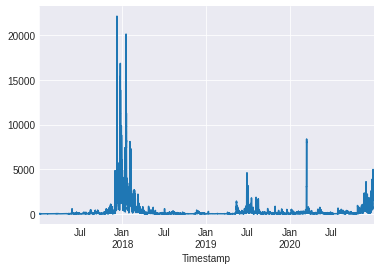

In [60]:
# Read TDA from disk
TDA = pd.read_csv('/content/gdrive/MyDrive/research/bitcoin/TDA.csv')

btc_short = btc.drop(btc.index[0:52])

btc_short['TDA']=TDA['norm'].to_numpy()
print(btc_short)
btc_short.loc[:,'TDA'].plot()
btc_short.to_csv('/content/gdrive/MyDrive/research/bitcoin/training.csv')

In [ ]:
# # Output training set to disk.
# # The training set consists of d features plus 1 y-value (label).

# d=3+1 # dimension of embedding, d = number of features + 1 y-value (label)
# g=0 # gap
# embedding = retClose_array[(np.arange(d)*(g+1))+ np.arange(np.max(retClose_array.shape[0] - (d-1)*(g+1), 0)).reshape(-1,1)]

# # Assign value of 1 to positive y-values, and 0 to negative y-values.
# embedding[:,d-1][embedding[:,d-1] >= 0] = 1
# embedding[:,d-1][embedding[:,d-1] < 0] = 0

# print(embedding)

# NVertices = embedding.shape[0]

# # Write the n-dim time series to disk
# with open('/content/gdrive/MyDrive/research/bitcoin/training.txt', 'w') as outfile:
#   # Format OFF file
#   #outfile.write('OFF\n')
#   #outfile.write('{} {} {}\n'.format(NVertices, 0, 0)) # 0 faces, 0 edges
#   np.savetxt(outfile, embedding, fmt=['%f', '%f', '%f', '%d'], header="x1 x2 x3 y")